### Importando as bibliotecas

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# Estacionariedade da série temporal
from statsmodels.tsa.stattools import adfuller

In [8]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('Dados//AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

In [10]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Testando a estacionariedade da série temporal

In [12]:
x = data['#Passengers']
result = adfuller(x)
result
print("ADF Estatísticas: %f" % result[0])
print("Valor de P: %f" % result[1])
print("Valores Críticos:")
for k, v in result[4].items():
    print("\t%s: %.3f" % (k, v))

ADF Estatísticas: 0.815369
Valor de P: 0.991880
Valores Críticos:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [13]:
# Como o valor de P: 0.991880, ou seja, maior que 0,05, temos que a série temporal não é estacionária.

### Tornando a série estacionária usando o Log

In [14]:
'''
A série pode ou não se tornar estacionária, vai depender das técnicas utilizadas. 
'''

d_log = np.log(data)

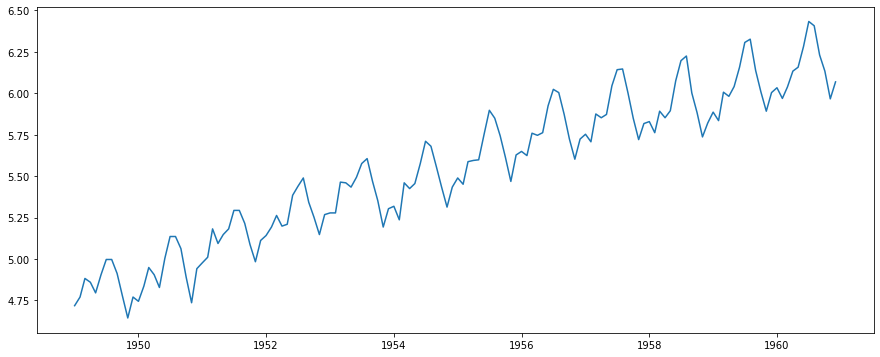

In [15]:
plt.plot(d_log)

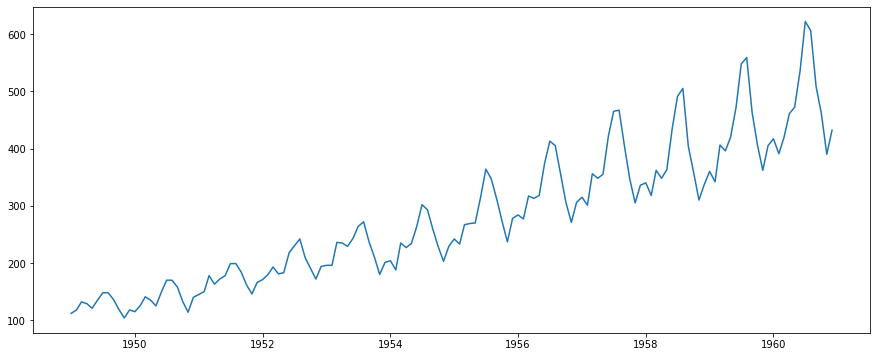

In [16]:
plt.plot(data)

'''
Aparentemente a técnica do Log não surtiu efeito nesses dados, não foi possível obeter uma suavização relevante
para que a série se tornasse estacionária.
'''

In [18]:
x_log = data['#Passengers']
result = adfuller(d_log)
result
print("ADF Estatísticas: %f" % result[0])
print("Valor de P: %f" % result[1])
print("Valores Críticos:")
for k, v in result[4].items():
    print("\t%s: %.3f" % (k, v))

ADF Estatísticas: -1.717017
Valor de P: 0.422367
Valores Críticos:
	1%: -3.482
	5%: -2.884
	10%: -2.579


O valor de P: 0.422367 continua maior que 0.05, logo, a série ainda não é estacionária, portanto a técnica do Log não 
é a adequada para esses dados.